<a href="https://colab.research.google.com/github/nickdhollman/MS-BAnDS-Google-Colab/blob/BAN-5743-Predictive-Analytics/NLP_Sentiment_Analysis_Python_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ e-Commerce: NLP and Sentiment Analysis Part 1
### YOU MUST USE PYTHON 3.11.11 FOR THIS SYNTAX TO WORK
### https://www.kaggle.com/code/rendyk/e-commerce-nlp-and-sentiment-analysis-part-1

In [ ]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Week 7 - Text Analytics in Predictive Modeling\\Womens Clothing E-Commerce Reviews.csv').iloc[:,1:]
dataset.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


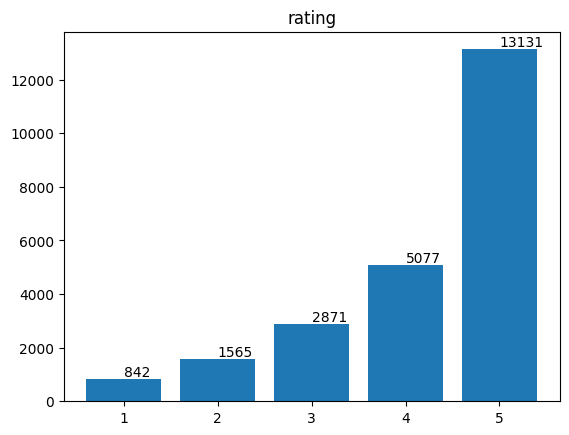

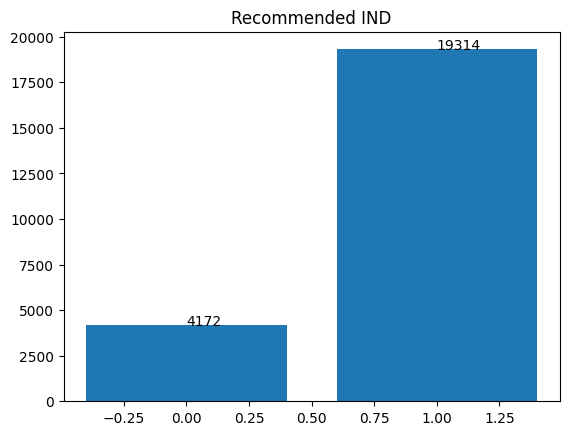

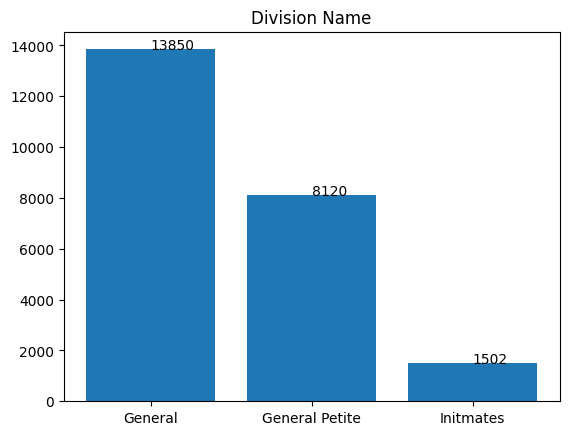

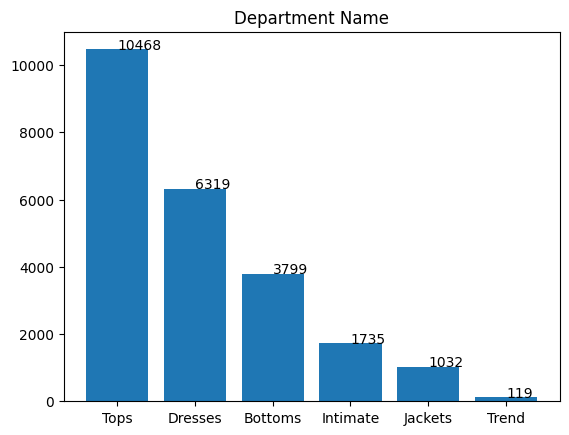

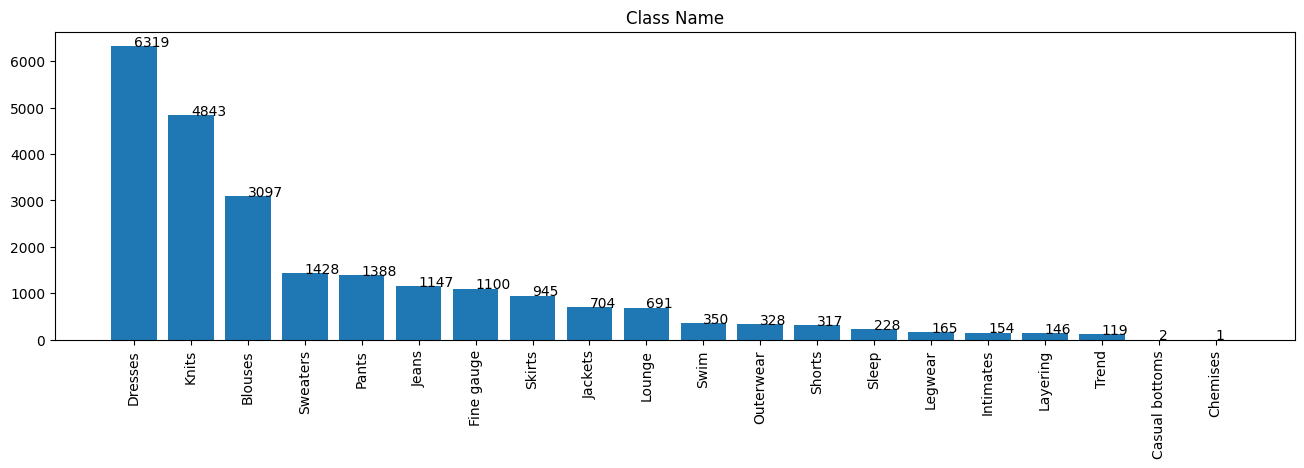

In [ ]:
plt.bar(dataset['Rating'].value_counts().index, list(dataset['Rating'].value_counts()))
for index, value in enumerate(list(dataset['Rating'].value_counts().sort_values())):
    plt.text(index+1, value+100, str(value))
plt.title('rating')
plt.show()

plt.bar(dataset['Recommended IND'].value_counts().index.astype(int), list(dataset['Recommended IND'].value_counts()))
for index, value in enumerate(list(dataset['Recommended IND'].value_counts().sort_values())):
    plt.text(index, value, str(value))
plt.title('Recommended IND')
plt.show()

plt.bar(dataset['Division Name'].value_counts().index, list(dataset['Division Name'].value_counts()))
for index, value in enumerate(list(dataset['Division Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Division Name')
plt.show()

plt.bar(dataset['Department Name'].value_counts().index, list(dataset['Department Name'].value_counts()))
for index, value in enumerate(list(dataset['Department Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Department Name')
plt.show()

plt.figure(figsize=(16,4))
plt.bar(dataset['Class Name'].value_counts().index, list(dataset['Class Name'].value_counts()))
for index, value in enumerate(list(dataset['Class Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Class Name')
plt.xticks(rotation=90)
plt.show()

# 1. Regular Expression

In [ ]:
import re

In [ ]:
text = 'The monkeys are eating 7 bananas on the tree!'
print(re.match('\w+', text)) # word
print(re.match('\d+', text)) # digit
print(re.match('\s', text)) # space
print(re.match('[a-z]+', text)) # alphabet
print(re.match('[A-Z]+', text)) # big caps alphabet
print(re.match('(\w+|\d+)', text)) # word or digit

<re.Match object; span=(0, 3), match='The'>
None
None
None
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 3), match='The'>


In [ ]:
print(re.split('\w+', text)) # word
print(re.split('\d+', text)) # digit
print(re.split('\s', text)) # space
print(re.split('[a-z]+', text)) # small caps alphabet
print(re.split('[A-Z]+', text)) # big caps alphabet
print(re.split('(\w+|\d+)', text)) # word or digit

['', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '!']
['The monkeys are eating ', ' bananas on the tree!']
['The', 'monkeys', 'are', 'eating', '7', 'bananas', 'on', 'the', 'tree!']
['T', ' ', ' ', ' ', ' 7 ', ' ', ' ', ' ', '!']
['', 'he monkeys are eating 7 bananas on the tree!']
['', 'The', ' ', 'monkeys', ' ', 'are', ' ', 'eating', ' ', '7', ' ', 'bananas', ' ', 'on', ' ', 'the', ' ', 'tree', '!']


In [ ]:
print(re.findall('\w+', text)) # word
print(re.findall('\d+', text)) # digit
print(re.findall('\s', text)) # space
print(re.findall('[a-z]+', text)) # small caps alphabet
print(re.findall('[a-z]', text)) # small caps alphabet
print(re.findall('[A-Z]+', text)) # big caps alphabet
print(re.findall('(\w+|\d+)', text)) # word or digit

['The', 'monkeys', 'are', 'eating', '7', 'bananas', 'on', 'the', 'tree']
['7']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['he', 'monkeys', 'are', 'eating', 'bananas', 'on', 'the', 'tree']
['h', 'e', 'm', 'o', 'n', 'k', 'e', 'y', 's', 'a', 'r', 'e', 'e', 'a', 't', 'i', 'n', 'g', 'b', 'a', 'n', 'a', 'n', 'a', 's', 'o', 'n', 't', 'h', 'e', 't', 'r', 'e', 'e']
['T']
['The', 'monkeys', 'are', 'eating', '7', 'bananas', 'on', 'the', 'tree']


In [ ]:
print(re.search('\w+', text)) # word
print(re.search('\d+', text)) # digit
print(re.search('\s', text)) # space
print(re.search('[a-z]+', text)) # small caps alphabet
print(re.search('[a-z]', text)) # small caps alphabet
print(re.search('[A-Z]+', text)) # big caps alphabet
print(re.search('(\w+|\d+)', text)) # word or digit

<re.Match object; span=(0, 3), match='The'>
<re.Match object; span=(23, 24), match='7'>
<re.Match object; span=(3, 4), match=' '>
<re.Match object; span=(1, 3), match='he'>
<re.Match object; span=(1, 2), match='h'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 3), match='The'>


# 2. Word Tokenization

In [ ]:
#%pip install nltk
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
word_tokenize(text)

['The', 'monkeys', 'are', 'eating', '7', 'bananas', 'on', 'the', 'tree', '!']

In [ ]:
text2 = 'The monkeys are eating 7 bananas on the tree! The tree will only have 5 bananas left later. One monkey is jumping to another tree.'
sent_tokenize(text2)

['The monkeys are eating 7 bananas on the tree!',
 'The tree will only have 5 bananas left later.',
 'One monkey is jumping to another tree.']

# 3. Named Entity Recognition (NER)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
text_tag = word_tokenize(text2)
nltk.pos_tag(text_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('monkeys', 'NNS'),
 ('are', 'VBP'),
 ('eating', 'VBG'),
 ('7', 'CD'),
 ('bananas', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('tree', 'NN'),
 ('!', '.'),
 ('The', 'DT'),
 ('tree', 'NN'),
 ('will', 'MD'),
 ('only', 'RB'),
 ('have', 'VB'),
 ('5', 'CD'),
 ('bananas', 'NNS'),
 ('left', 'VBD'),
 ('later', 'RB'),
 ('.', '.'),
 ('One', 'CD'),
 ('monkey', 'NN'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('to', 'TO'),
 ('another', 'DT'),
 ('tree', 'NN'),
 ('.', '.')]

CC coordinating conjunction; CD cardinal digit; DT determiner; EX existential e.g. "there is"; FW foreign word; IN preposition/subordinating conjunction; JJ adjective; JJR comparative adjective; JJS superlative adjective; LS list marker; MD modal; NN noun; singular; NNS plural noun; NNP singular proper noun; NNPS plural proper noun; PDT predeterminer; POS possessive ending; PRP personal pronoun; PRP💲 possessive pronoun; RB adverb; RBR comparative adverb; RBS superlative adverb; RP particle; TO to; UH interjection; VB base form verb; VBD past tense verb; VBG gerund/present participle verb; VBN past participle verb; VBP verb for non-3rd person singular present;  VBZ verb for 3rd person singular present; WDT wh-determiner; WP wh-pronoun; WP💲 possessive wh-pronoun; WRB wh-abverb

In [ ]:
# you must use Python 3.11.11 for this to work
import spacy

In [ ]:
#pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
spa = spacy.load("en_core_web_sm")
spa_text = spa(text)

print('text' + '\t' + 'lemmatized' + '\t' + 'PoS' + '\t' + 'tag' + '\t' + 'dep' + '\t' +
          'shape' + '\t' + 'is_alphabet' + '\t' + 'is_stop_words')

for word in spa_text:
    print(word.text + '\t' + word.lemma_ + '\t\t' + word.pos_ + '\t' + word.tag_ + '\t' + word.dep_ + '\t' + word.shape_ + '\t' + str(word.is_alpha) + '\t\t' + str(word.is_stop))

text	lemmatized	PoS	tag	dep	shape	is_alphabet	is_stop_words
The	the		DET	DT	det	Xxx	True		True
monkeys	monkey		NOUN	NNS	nsubj	xxxx	True		False
are	be		AUX	VBP	aux	xxx	True		True
eating	eat		VERB	VBG	ROOT	xxxx	True		False
7	7		NUM	CD	nummod	d	False		False
bananas	banana		NOUN	NNS	dobj	xxxx	True		False
on	on		ADP	IN	prep	xx	True		True
the	the		DET	DT	det	xxx	True		True
tree	tree		NOUN	NN	pobj	xxxx	True		False
!	!		PUNCT	.	punct	!	False		False


# 4. Word Cloud

In [ ]:
#%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

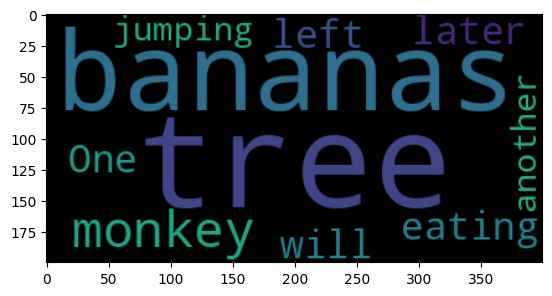

In [ ]:
word_clo = WordCloud(stopwords=set(STOPWORDS)).generate(text2)
plt.imshow(word_clo, interpolation='bilinear')
plt.show()

# 5. Stemming and Lemmatization

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
print(PorterStemmer().stem('studies'))

# Lemmatization
from nltk.stem import WordNetLemmatizer
print(WordNetLemmatizer().lemmatize('studies'))

studi
study


In [ ]:
# Lemmatize a sentence
lemm_text = [WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)]
lemm_text

['The', 'monkey', 'are', 'eating', '7', 'banana', 'on', 'the', 'tree', '!']

# 6. Bag-of-words (BoW)

In [ ]:
from collections import Counter

In [ ]:
Counter(word_tokenize(text2))

Counter({'tree': 3,
         'The': 2,
         'bananas': 2,
         '.': 2,
         'monkeys': 1,
         'are': 1,
         'eating': 1,
         '7': 1,
         'on': 1,
         'the': 1,
         '!': 1,
         'will': 1,
         'only': 1,
         'have': 1,
         '5': 1,
         'left': 1,
         'later': 1,
         'One': 1,
         'monkey': 1,
         'is': 1,
         'jumping': 1,
         'to': 1,
         'another': 1})

In [ ]:
Counter(word_tokenize(text2)).most_common(3)

[('tree', 3), ('The', 2), ('bananas', 2)]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nickd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text2_stop = [word for word in word_tokenize(text2.lower())  if word.isalpha() if word not in stopwords.words('english')]
Counter(text2_stop)

Counter({'tree': 3,
         'bananas': 2,
         'monkeys': 1,
         'eating': 1,
         'left': 1,
         'later': 1,
         'one': 1,
         'monkey': 1,
         'jumping': 1,
         'another': 1})

In [ ]:
#%pip install numpy cython

In [ ]:
#%pip install -U scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


Analyze the datasets

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIB

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [ ]:
# Filter rows with column
data = dataset.loc[dataset['Review Text'].notnull(),:]

# Apply uni- and bigram vectorizer
class lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, df):
        return [self.wnl.lemmatize(word) for word in word_tokenize(df)]

vectorizer = CountVectorizer(max_features=100, max_df=0.95, min_df=0.1, ngram_range=(1,2),
                             tokenizer=lemmatizer(), lowercase=True, stop_words='english',
                             token_pattern = r'\w+')

vectorizer.fit(data['Review Text'])
count_vector = vectorizer.transform(data['Review Text'])
count_vector

C:\Users\nickd\anaconda3\envs\py311\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\nickd\anaconda3\envs\py311\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 205899 stored elements and shape (22641, 46)>

In [ ]:
# Transform into data frame
bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow.head()

,!,','','m,'s,(,),",",. 'm,. 's,...,ordered,perfect,really,run,size,small,soft,wa,wear,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,2,2,4,0,0,...,1,0,1,0,1,3,0,3,0,1
3,2,0,0,0,1,0,0,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


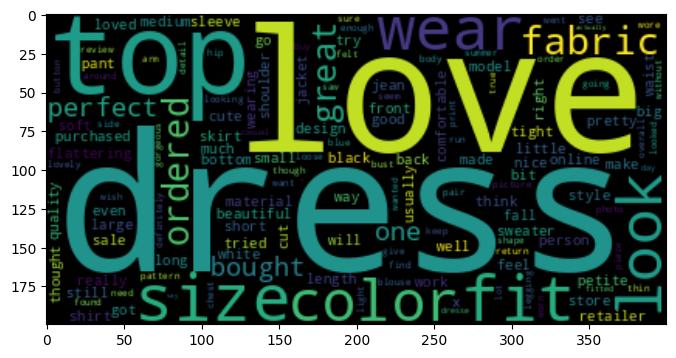

In [ ]:
visual_rev = WordCloud().generate(' '.join(data['Review Text']))
plt.figure(figsize=(8,8))
plt.imshow(visual_rev, interpolation='bilinear')
plt.show()

# 7. Term Frequency — Inverse Document Frequency (Tf-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=100)
tfidf.fit(data['Review Text'])
tfidf_data = tfidf.transform(data['Review Text'])
tfidf_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 486803 stored elements and shape (22641, 100)>

In [ ]:
tfidf_data = pd.DataFrame(tfidf_data.toarray(), columns=tfidf.get_feature_names_out())
tfidf_data.head()

,all,also,am,an,and,are,as,at,back,be,...,wear,well,when,which,will,with,work,would,xs,you
0,0.000000,0.0,0.000000,0.0,0.602589,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.148418,0.0,0.133039,0.0,0.0,0.0,0.0,0.136029,...,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.307109,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.163130,0.0,0.0,0.0,0.0,0.111198,...,0.000000,0.000000,0.0,0.152,0.0,0.000000,0.163481,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.142825,0.0,0.0,0.0,0.0,0.000000,...,0.300158,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.228419,0.0,0.000000,0.0,0.082899,0.0,0.0,0.0,0.0,0.000000,...,0.174219,0.217172,0.0,0.000,0.0,0.273455,0.000000,0.000000,0.0,0.0


# 8. Sentiment Analysis

In [ ]:
#%pip install textblob
from textblob import TextBlob

In [ ]:
TextBlob(text2).sentiment

Sentiment(polarity=-0.0125, subjectivity=0.25)

In [ ]:
# Applying text blob sentiment
def polarity(t):
    a = TextBlob(t).sentiment
    return a[0]

def subjectivity(t):
    a = TextBlob(t).sentiment
    return a[1]

data['polarity'] = data.apply(lambda t: polarity(t['Review Text']), axis=1)
data['subjectivity'] = data.apply(lambda t: subjectivity(t['Review Text']), axis=1)
data.head()

C:\Users\nickd\AppData\Local\Temp\ipykernel_39444\2678729559.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data.apply(lambda t: polarity(t['Review Text']), axis=1)
C:\Users\nickd\AppData\Local\Temp\ipykernel_39444\2678729559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subjectivity'] = data.apply(lambda t: subjectivity(t['Review Text']), axis=1)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,subjectivity
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


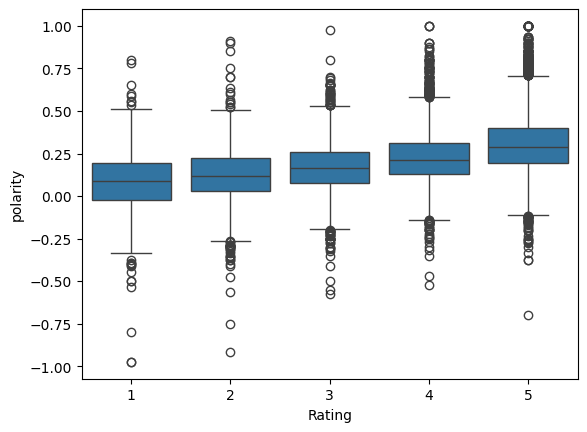

In [ ]:
# Polarity and Rating
sns.boxplot(data=data, x='Rating', y='polarity')
plt.show()